### Imports

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

### Read the dataframe

In [3]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### binning the quality data to bad and good

In [5]:
bins = (2,6.5,8)
labels = ['bad','good']
data['quality'] = pd.cut(data['quality'],bins=bins,labels=labels)

In [6]:
data['quality']

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): [bad < good]

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [8]:
le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])

In [9]:
X = data.drop('quality',axis=1).values
y = data['quality'].values.reshape(-1,1)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [11]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (1279, 11)
X_test shape:  (320, 11)
y_train shape:  (1279, 1)
y_test shape:  (320, 1)


### Logistic Regression

In [13]:
lreg = LogisticRegression().fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
lreg_pred = lreg.predict(X_test)

logistic regression accuracy score:  0.896875


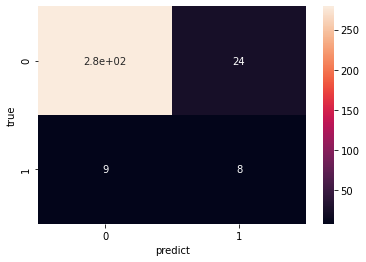

In [15]:
lreg_cm = confusion_matrix(lreg_pred,y_test)
ax = sns.heatmap(lreg_cm,annot=True)
ax.set(xlabel='predict', ylabel='true')
lreg_as = accuracy_score(lreg_pred,y_test)
print("logistic regression accuracy score: ",lreg_as)

### K nearest neighbors classification

In [16]:
KN = KNeighborsClassifier(n_neighbors=5)
KN.fit(X_train,y_train)

<ipython-input-16-6951c7a36dea>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  KN.fit(X_train,y_train)


KNeighborsClassifier()

In [17]:
kn_pred = KN.predict(X_test)
kn_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

KNearest neighbors accuracy score:  0.8625


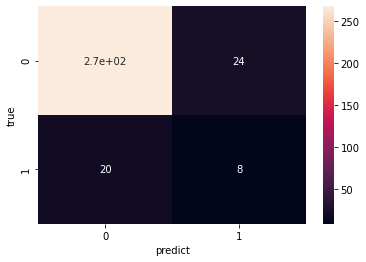

In [18]:
kn_cm = confusion_matrix(kn_pred,y_test)
ax = sns.heatmap(kn_cm,annot=True)
ax.set(xlabel='predict', ylabel='true')
kn_as = accuracy_score(kn_pred,y_test)
print("KNearest neighbors accuracy score: ",kn_as)

### Kmeans clustering

KMeans clustering accuracy score:  0.653125


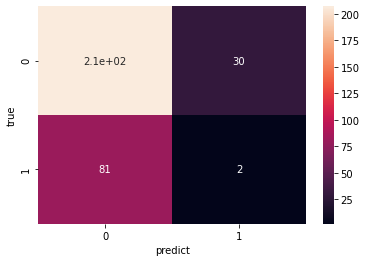

In [19]:
kmeans = KMeans(n_clusters=2).fit(X_test)
kmeans_predict = kmeans.predict(X_test)
km_cm = confusion_matrix(kmeans_predict,y_test)
ax = sns.heatmap(km_cm,annot=True)
ax.set(xlabel='predict', ylabel='true')
km_as = accuracy_score(kmeans_predict,y_test)
print("KMeans clustering accuracy score: ",km_as)

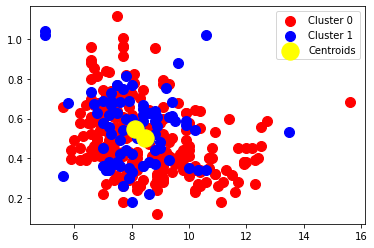

In [20]:
plt.scatter(X_test[kmeans_predict == 0, 0], X_test[kmeans_predict == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X_test[kmeans_predict == 1, 0], X_test[kmeans_predict == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

### Conclusion

Judging from the above plots and accuracy, I'd say that Logistic Regression is the clear winner!

But K-Means Clustering didn't do too bad either; especially when you consider the fact that it's not built for the task of supervised learning, like Logistic Regression is!

But KMeans Clustering did bad. It is not a good idea to use KMeans clustering in this scenerio